# PyTorchTuto_3.ipynb

## Author: Akshay Anand, PhD Candidate  
**Florida State University (2021 - 20XX)**

[*Github*](https://github.com/anand-me)

## Introduction  

Welcome to the third notebook in the PyTorch tutorial series! In this session, we will build upon the concepts introduced in the first notebook and dive deeper into PyTorch's capabilities.

This notebook will focus on:  
1. **Neural Networks with PyTorch**  
   - PyTorch's nn Module  
   - Building Neural Network Layers
   - Creating Complete Network Architectures  

By the end of this notebook, you will understand how to design and implement neural network architectures using PyTorch's elegant and flexible API. This knowledge is fundamental for developing sophisticated deep learning models for various applications

---

Let’s get started!
---

<a href="https://colab.research.google.com/github/anand-me/deep-learning-with-pytorch-tutorials/blob/main/src/PyTorchTuto_3.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Enable plots in the notebook
%matplotlib inline

In [ ]:
print(f"PyTorch version: {torch.__version__}")
print(f"GPU available: {torch.cuda.is_available()}")

PyTorch version: 2.6.0+cu124
GPU available: False


In [ ]:
# ============================================================================ #
#                          1. PyTorch's nn Module                              #
# ============================================================================ #

print("\n" + "="*80)
print("1. PYTORCH'S nn MODULE".center(80))
print("="*80)



                             1. PYTORCH'S nn MODULE                             


In [ ]:
# ---------------------------------------------------------------------------- #
#                             Core Components                                   #
# ---------------------------------------------------------------------------- #

print("\n📌 Module Hierarchy in PyTorch:")
print("  • torch: Main PyTorch package")
print("    • torch.nn: Neural network module")
print("      • torch.nn.Module: Base class for all neural network modules")
print("      • torch.nn.functional: Functions that don't have parameters")
print("      • torch.nn.init: Parameter initialization functions")
print("    • torch.optim: Optimization algorithms")

print("\n📌 Key Components of torch.nn:")
print("  • Layers (Linear, Conv2d, etc.)")
print("  • Activation Functions (ReLU, Sigmoid, etc.)")
print("  • Loss Functions (MSELoss, CrossEntropyLoss, etc.)")
print("  • Containers (Sequential, ModuleList, etc.)")


📌 Module Hierarchy in PyTorch:
  • torch: Main PyTorch package
    • torch.nn: Neural network module
      • torch.nn.Module: Base class for all neural network modules
      • torch.nn.functional: Functions that don't have parameters
      • torch.nn.init: Parameter initialization functions
    • torch.optim: Optimization algorithms

📌 Key Components of torch.nn:
  • Layers (Linear, Conv2d, etc.)
  • Activation Functions (ReLU, Sigmoid, etc.)
  • Loss Functions (MSELoss, CrossEntropyLoss, etc.)
  • Containers (Sequential, ModuleList, etc.)


In [ ]:
# ---------------------------------------------------------------------------- #
#                            Basic nn.Module Example                            #
# ---------------------------------------------------------------------------- #

print("\n📝 Basic nn.Module Example:")


📝 Basic nn.Module Example:


In [ ]:
class SimpleModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Create an instance of the model
model = SimpleModel(input_size=10, hidden_size=20, output_size=5)
print(model)

SimpleModel(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=5, bias=True)
)


In [ ]:
# Generate some random input data
x = torch.randn(8, 10)  # Batch size of 8, input size of 10

In [ ]:
# Forward pass
output = model(x)
print("\nInput shape:", x.shape)
print("Output shape:", output.shape)


Input shape: torch.Size([8, 10])
Output shape: torch.Size([8, 5])


In [ ]:
# Examine model parameters
print("\n📊 Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")


📊 Model Parameters:
fc1.weight: torch.Size([20, 10])
fc1.bias: torch.Size([20])
fc2.weight: torch.Size([5, 20])
fc2.bias: torch.Size([5])


In [ ]:
# The nn.Module base class provides important functionality
print("\n🔑 Key nn.Module Functionality:")
print("  • Parameter management")
print("  • Moving to devices (CPU/GPU)")
print("  • Saving and loading models")
print("  • Training and evaluation modes")

# Demonstrate switching between training and evaluation modes
model.train()  # Set to training mode
print("\nTraining mode:", model.training)

model.eval()   # Set to evaluation mode
print("Evaluation mode:", model.training)


🔑 Key nn.Module Functionality:
  • Parameter management
  • Moving to devices (CPU/GPU)
  • Saving and loading models
  • Training and evaluation modes

Training mode: True
Evaluation mode: False


In [ ]:
# ============================================================================ #
#                       2. Building Neural Network Layers                       #
# ============================================================================ #

print("\n" + "="*80)
print("2. BUILDING NEURAL NETWORK LAYERS".center(80))
print("="*80)



                       2. BUILDING NEURAL NETWORK LAYERS                        


In [ ]:
# ---------------------------------------------------------------------------- #
#                              1. Linear Layers                                 #
# ---------------------------------------------------------------------------- #

print("\n📌 1. Linear Layer (nn.Linear):")
linear_layer = nn.Linear(in_features=10, out_features=5, bias=True)
print(linear_layer)
print(f"Weight shape: {linear_layer.weight.shape}")
print(f"Bias shape: {linear_layer.bias.shape}")


📌 1. Linear Layer (nn.Linear):
Linear(in_features=10, out_features=5, bias=True)
Weight shape: torch.Size([5, 10])
Bias shape: torch.Size([5])


In [ ]:
# Demo of linear layer
input_data = torch.randn(3, 10)  # 3 samples, 10 features each
output = linear_layer(input_data)
print(f"Input shape: {input_data.shape}")
print(f"Output shape: {output.shape}")

Input shape: torch.Size([3, 10])
Output shape: torch.Size([3, 5])


In [ ]:
# ---------------------------------------------------------------------------- #
#                              2. Convolutional Layers
# ---------------------------------------------------------------------------- #
print("\n2. Convolutional Layers (nn.Conv2d):")
conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
print(conv_layer)
print(f"Weight shape: {conv_layer.weight.shape}")  # out_channels, in_channels, kernel_height, kernel_width
print(f"Bias shape: {conv_layer.bias.shape}")      # out_channels


2. Convolutional Layers (nn.Conv2d):
Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Weight shape: torch.Size([16, 3, 3, 3])
Bias shape: torch.Size([16])


In [ ]:
# Demo of convolutional layer
# Input: batch_size, channels, height, width
input_image = torch.randn(1, 3, 32, 32)  # 1 RGB image of size 32x32
output_feature_map = conv_layer(input_image)
print(f"Input shape: {input_image.shape}")
print(f"Output shape: {output_feature_map.shape}")

Input shape: torch.Size([1, 3, 32, 32])
Output shape: torch.Size([1, 16, 32, 32])


In [ ]:
# ---------------------------------------------------------------------------- #
#                              3. Pooling Layers
# ---------------------------------------------------------------------------- #
print("\n3. Pooling Layers:")
maxpool_layer = nn.MaxPool2d(kernel_size=2, stride=2)
avgpool_layer = nn.AvgPool2d(kernel_size=2, stride=2)

output_maxpool = maxpool_layer(output_feature_map)
output_avgpool = avgpool_layer(output_feature_map)

print(f"Original shape: {output_feature_map.shape}")
print(f"After MaxPool: {output_maxpool.shape}")
print(f"After AvgPool: {output_avgpool.shape}")


3. Pooling Layers:
Original shape: torch.Size([1, 16, 32, 32])
After MaxPool: torch.Size([1, 16, 16, 16])
After AvgPool: torch.Size([1, 16, 16, 16])


In [ ]:
# ---------------------------------------------------------------------------- #
#                              4. Normalization Layers
# ---------------------------------------------------------------------------- #
print("\n4. Normalization Layers:")
batch_norm = nn.BatchNorm2d(num_features=16)
layer_norm = nn.LayerNorm(normalized_shape=[16, 16, 16])

print(batch_norm)
print(layer_norm)


4. Normalization Layers:
BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
LayerNorm((16, 16, 16), eps=1e-05, elementwise_affine=True)


In [ ]:
# ---------------------------------------------------------------------------- #
#                              5. Dropout Layers
# ---------------------------------------------------------------------------- #
print("\n5. Dropout Layers:")
dropout = nn.Dropout(p=0.5)
print(dropout)


5. Dropout Layers:
Dropout(p=0.5, inplace=False)


In [ ]:
# ---------------------------------------------------------------------------- #
#                              6. Recurrent Layers
# ---------------------------------------------------------------------------- #
print("\n6. Recurrent Layers:")
rnn = nn.RNN(input_size=10, hidden_size=20, num_layers=2, batch_first=True)
lstm = nn.LSTM(input_size=10, hidden_size=20, num_layers=2, batch_first=True)
gru = nn.GRU(input_size=10, hidden_size=20, num_layers=2, batch_first=True)

print(rnn)
print(lstm)
print(gru)


6. Recurrent Layers:
RNN(10, 20, num_layers=2, batch_first=True)
LSTM(10, 20, num_layers=2, batch_first=True)
GRU(10, 20, num_layers=2, batch_first=True)


In [ ]:
# Demo of LSTM layer
# Input: batch_size, sequence_length, input_size
sequence_data = torch.randn(5, 8, 10)  # 5 batches, 8 time steps, 10 features
output, (hidden, cell) = lstm(sequence_data)
print(f"Input shape: {sequence_data.shape}")
print(f"Output shape: {output.shape}")
print(f"Hidden state shape: {hidden.shape}")
print(f"Cell state shape: {cell.shape}")

Input shape: torch.Size([5, 8, 10])
Output shape: torch.Size([5, 8, 20])
Hidden state shape: torch.Size([2, 5, 20])
Cell state shape: torch.Size([2, 5, 20])


In [ ]:
# ---------------------------------------------------------------------------- #
#                              7. Embedding Layer
# ---------------------------------------------------------------------------- #
print("\n7. Embedding Layer:")
embedding = nn.Embedding(num_embeddings=10000, embedding_dim=300)
print(embedding)


7. Embedding Layer:
Embedding(10000, 300)


In [ ]:
# Demo of embedding layer
word_indices = torch.LongTensor([[1, 2, 3], [4, 5, 6]])  # 2 sentences, 3 words each
word_embeddings = embedding(word_indices)
print(f"Input shape: {word_indices.shape}")
print(f"Output shape: {word_embeddings.shape}")

Input shape: torch.Size([2, 3])
Output shape: torch.Size([2, 3, 300])


In [ ]:
# ---------------------------------------------------------------------------- #
#                              8. Container Layers
# ---------------------------------------------------------------------------- #
print("\n8. Container Layers:")


8. Container Layers:


In [ ]:
# Sequential container
sequential_model = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 15),
    nn.ReLU(),
    nn.Linear(15, 5)
)
print(sequential_model)

# ModuleList container
module_list = nn.ModuleList([
    nn.Linear(10, 20),
    nn.Linear(20, 15),
    nn.Linear(15, 5)
])
print(module_list)

# ModuleDict container
module_dict = nn.ModuleDict({
    'linear1': nn.Linear(10, 20),
    'linear2': nn.Linear(20, 15),
    'linear3': nn.Linear(15, 5)
})
print(module_dict)

Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=5, bias=True)
)
ModuleList(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): Linear(in_features=20, out_features=15, bias=True)
  (2): Linear(in_features=15, out_features=5, bias=True)
)
ModuleDict(
  (linear1): Linear(in_features=10, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=15, bias=True)
  (linear3): Linear(in_features=15, out_features=5, bias=True)
)


In [ ]:
# ============================================================================ #
#                       3. ACTIVATION FUNCTIONS
# ============================================================================ #

print("\n" + "="*80)
print("3. ACTIVATION FUNCTIONS".center(80))
print("="*80)


                            3. ACTIVATION FUNCTIONS                             


In [ ]:
# Create a range of values to visualize
x = torch.linspace(-5, 5, 200)


Softmax Example:
Logits:
tensor([[-5.,  0.,  5.],
        [ 5.,  0., -5.]])
Probabilities (sum to 1 along dim=1):
tensor([[4.5094e-05, 6.6925e-03, 9.9326e-01],
        [9.9326e-01, 6.6925e-03, 4.5094e-05]])
Sum along dim=1: tensor([1., 1.])


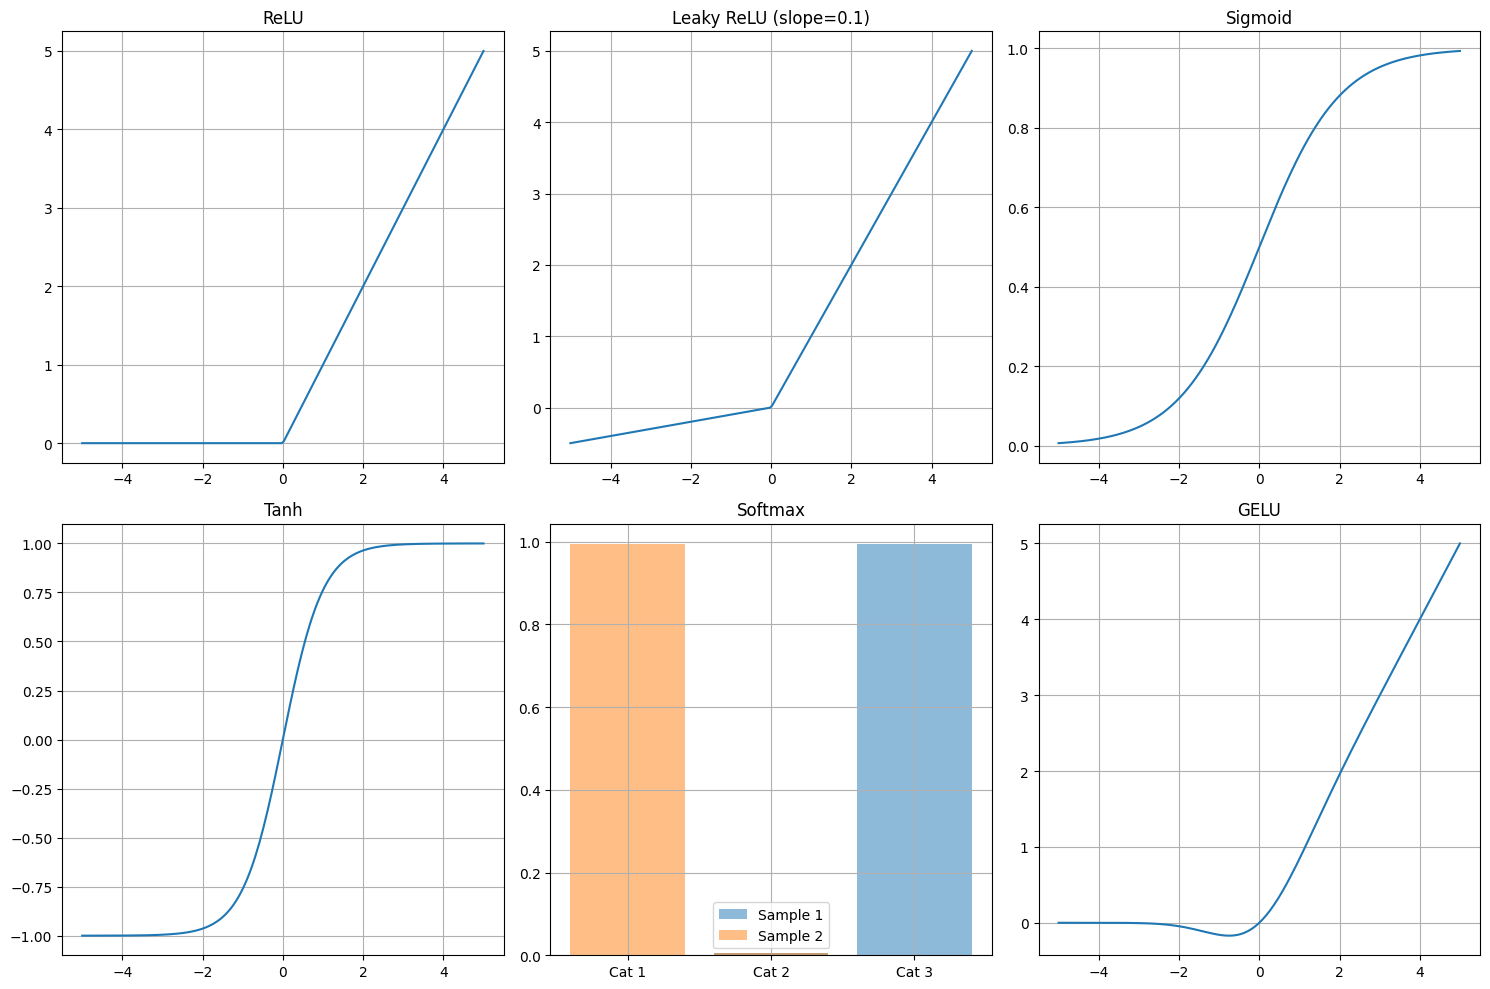

In [ ]:
# Set up the plotting
plt.figure(figsize=(15, 10))

# 1. ReLU
plt.subplot(2, 3, 1)
relu = nn.ReLU()
y_relu = relu(x)
plt.plot(x.numpy(), y_relu.numpy())
plt.title('ReLU')
plt.grid(True)

# 2. Leaky ReLU
plt.subplot(2, 3, 2)
leaky_relu = nn.LeakyReLU(negative_slope=0.1)
y_leaky_relu = leaky_relu(x)
plt.plot(x.numpy(), y_leaky_relu.numpy())
plt.title('Leaky ReLU (slope=0.1)')
plt.grid(True)

# 3. Sigmoid
plt.subplot(2, 3, 3)
sigmoid = nn.Sigmoid()
y_sigmoid = sigmoid(x)
plt.plot(x.numpy(), y_sigmoid.numpy())
plt.title('Sigmoid')
plt.grid(True)

# 4. Tanh
plt.subplot(2, 3, 4)
tanh = nn.Tanh()
y_tanh = tanh(x)
plt.plot(x.numpy(), y_tanh.numpy())
plt.title('Tanh')
plt.grid(True)

# 5. Softmax
plt.subplot(2, 3, 5)
# For softmax, we'll show it on a multi-dimensional input
logits = torch.tensor([[-5.0, 0.0, 5.0], [5.0, 0.0, -5.0]])
softmax = nn.Softmax(dim=1)
probabilities = softmax(logits)

print("\nSoftmax Example:")
print(f"Logits:\n{logits}")
print(f"Probabilities (sum to 1 along dim=1):\n{probabilities}")
print(f"Sum along dim=1: {probabilities.sum(dim=1)}")

x_categories = ['Cat 1', 'Cat 2', 'Cat 3']
plt.bar(x_categories, probabilities[0].numpy(), alpha=0.5, label='Sample 1')
plt.bar(x_categories, probabilities[1].numpy(), alpha=0.5, label='Sample 2')
plt.title('Softmax')
plt.legend()
plt.grid(True)

# 6. GELU
plt.subplot(2, 3, 6)
gelu = nn.GELU()
y_gelu = gelu(x)
plt.plot(x.numpy(), y_gelu.numpy())
plt.title('GELU')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Using activation functions in models
print("\nActivation Functions Usage:")
print("1. As module instances:")
print("   model = nn.Sequential(nn.Linear(10, 20), nn.ReLU(), nn.Linear(20, 5))")

print("\n2. From the functional API:")
print("   def forward(self, x):")
print("       x = self.fc1(x)")
print("       x = F.relu(x)")
print("       return x")


Activation Functions Usage:
1. As module instances:
   model = nn.Sequential(nn.Linear(10, 20), nn.ReLU(), nn.Linear(20, 5))

2. From the functional API:
   def forward(self, x):
       x = self.fc1(x)
       x = F.relu(x)
       return x


In [ ]:
# ============================================================================ #
#                        Functional vs Module form
# ============================================================================ #

print("\n" + "="*80)
print("Functional vs Module form".center(80))
print("="*80)


                           Functional vs Module form                            


In [ ]:
x = torch.randn(5, 10)

In [ ]:
# Module form
relu_module = nn.ReLU()
output_module = relu_module(x)

In [ ]:
# Functional form
output_functional = F.relu(x)

In [ ]:
print(f"Are outputs identical? {torch.allclose(output_module, output_functional)}")

Are outputs identical? True


In [ ]:
# Which activation function to use?
print("\nChoosing Activation Functions:")
print("1. ReLU: Default choice for most hidden layers")
print("2. Leaky ReLU/ELU: When dying ReLU is a concern")
print("3. Sigmoid: Binary classification output layer")
print("4. Tanh: When outputs need to be between -1 and 1")
print("5. Softmax: Multi-class classification output layer")
print("6. GELU: Often used in transformer architectures")



Choosing Activation Functions:
1. ReLU: Default choice for most hidden layers
2. Leaky ReLU/ELU: When dying ReLU is a concern
3. Sigmoid: Binary classification output layer
4. Tanh: When outputs need to be between -1 and 1
5. Softmax: Multi-class classification output layer
6. GELU: Often used in transformer architectures


In [ ]:
# How activations affect gradients
print("\nActivation Functions and Gradients:")
x = torch.linspace(-5, 5, 100, requires_grad=True)


Activation Functions and Gradients:


In [ ]:
# ReLU gradient
y_relu = F.relu(x)
y_relu.sum().backward()
grad_relu = x.grad.clone()
x.grad.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [ ]:
# Sigmoid gradient
y_sigmoid = torch.sigmoid(x)
y_sigmoid.sum().backward()
grad_sigmoid = x.grad.clone()
x.grad.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [ ]:
# Tanh gradient
y_tanh = torch.tanh(x)
y_tanh.sum().backward()
grad_tanh = x.grad.clone()

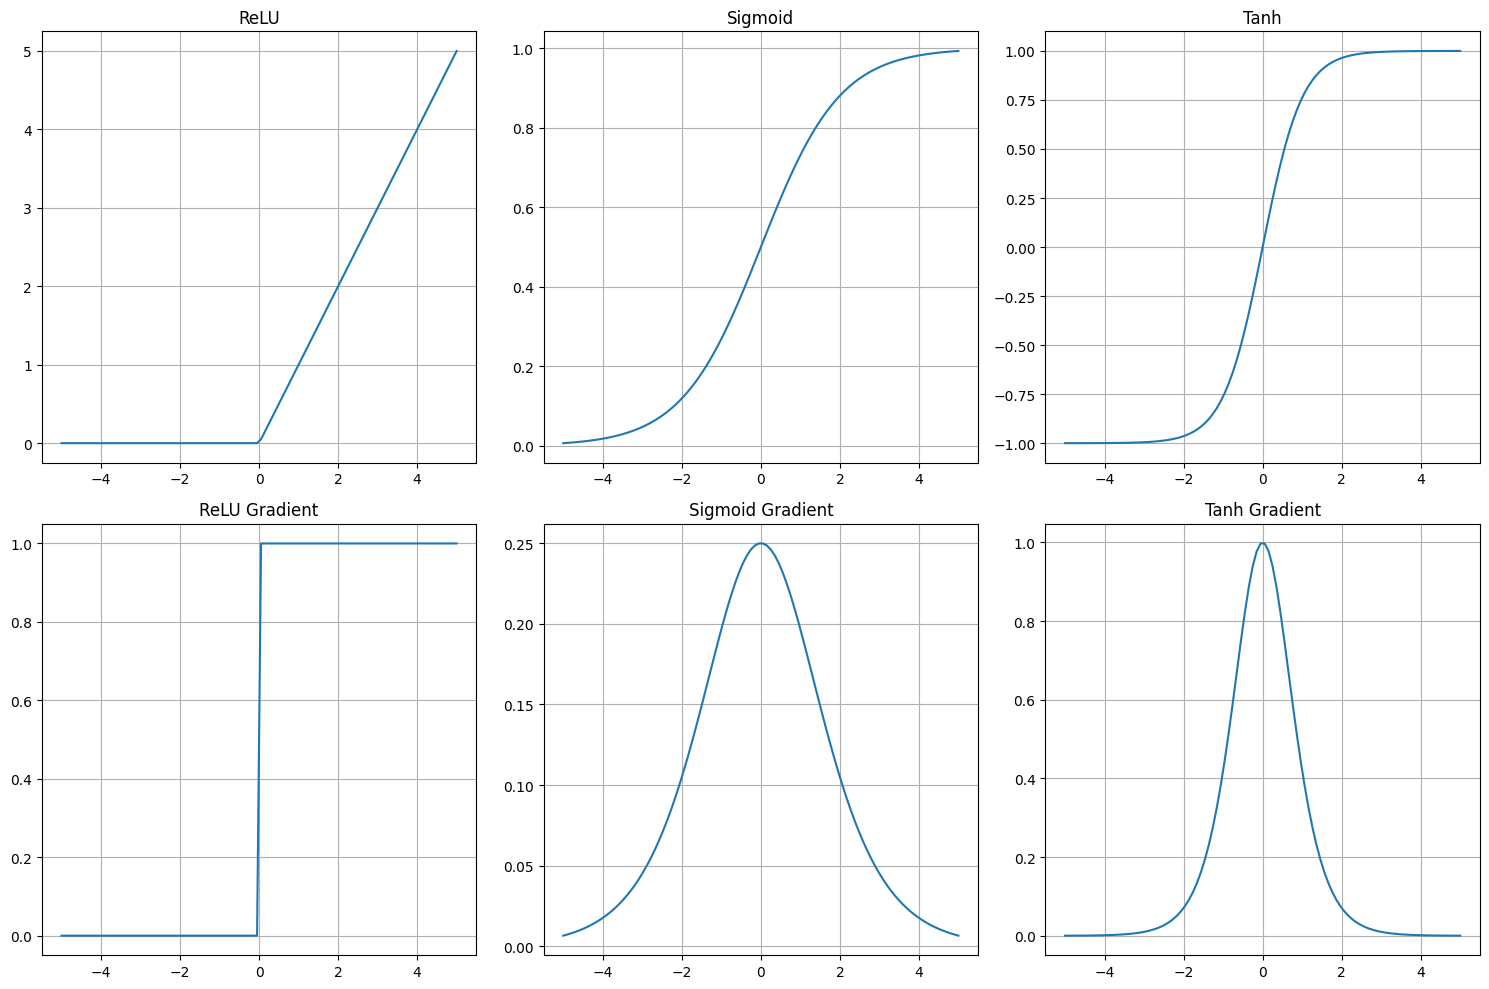

In [ ]:
# Plot the activations and their gradients
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(x.detach().numpy(), y_relu.detach().numpy())
plt.title('ReLU')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x.detach().numpy(), y_sigmoid.detach().numpy())
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x.detach().numpy(), y_tanh.detach().numpy())
plt.title('Tanh')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x.detach().numpy(), grad_relu.numpy())
plt.title('ReLU Gradient')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x.detach().numpy(), grad_sigmoid.numpy())
plt.title('Sigmoid Gradient')
plt.grid(True)

plt.subplot(2, 3, 6)
plt.plot(x.detach().numpy(), grad_tanh.numpy())
plt.title('Tanh Gradient')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================ #
#                        4. Creating Complete Network Architectures
# ============================================================================ #

print("\n" + "="*80)
print("4. Creating Complete Network Architecturesm".center(80))
print("="*80)


                  4. Creating Complete Network Architecturesm                   


In [ ]:
# 1. Multi-Layer Perceptron (MLP)
print("\n1. Multi-Layer Perceptron (MLP):")

class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_prob=0.2):
        super(MLP, self).__init__()

        # Create a list to hold all layers
        layers = []

        # Input layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_prob))

        # Hidden layers
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_prob))

        # Output layer
        layers.append(nn.Linear(hidden_sizes[-1], output_size))

        # Combine all layers into a Sequential module
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Create an MLP instance
mlp = MLP(input_size=784, hidden_sizes=[512, 256, 128], output_size=10)
print(mlp)



1. Multi-Layer Perceptron (MLP):
MLP(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# 2. Convolutional Neural Network (CNN)
print("\n2. Convolutional Neural Network (CNN):")

class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv_layers = nn.Sequential(
            # First conv block
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Second conv block
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Third conv block
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 3 * 3, 512),  # For a 28x28 input image
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Create a CNN instance
cnn = CNN(num_classes=10)
print(cnn)

# Trace data flow through the CNN
sample_input = torch.randn(1, 1, 28, 28)  # Single MNIST-like image
print("\nData flow through CNN:")
print(f"Input shape: {sample_input.shape}")

x = cnn.conv_layers[0:3](sample_input)  # First conv block
print(f"After first conv block: {x.shape}")

x = cnn.conv_layers[3:6](x)  # Second conv block
print(f"After second conv block: {x.shape}")

x = cnn.conv_layers[6:9](x)  # Third conv block
print(f"After third conv block: {x.shape}")

x = cnn.fc_layers(x)  # Fully connected layers
print(f"Final output shape: {x.shape}")


2. Convolutional Neural Network (CNN):
CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1152, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

Data flow through CNN:
Input shape: torch.Size([1, 1, 28, 28])
After first conv block: torch.Size([1, 32, 14, 14])
After second conv block: to

In [ ]:
# 3. Recurrent Neural Network (RNN)
print("\n3. Recurrent Neural Network (RNN):")

class RecurrentNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, bidirectional=False):
        super(RecurrentNN, self).__init__()

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional
        )

        # Fully connected layer
        fc_input_size = hidden_size * 2 if bidirectional else hidden_size
        self.fc = nn.Linear(fc_input_size, output_size)

    def forward(self, x):
        # x shape: (batch_size, sequence_length, input_size)

        # Pass through LSTM
        lstm_out, (hidden, cell) = self.lstm(x)

        # Take the output of the last time step
        if self.lstm.bidirectional:
            # Concatenate the last hidden state from both directions
            final_hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)
        else:
            final_hidden = hidden[-1]

        # Pass through fully connected layer
        output = self.fc(final_hidden)

        return output

# Create an RNN instance
rnn_model = RecurrentNN(
    input_size=28,          # Each row of an MNIST image
    hidden_size=128,
    num_layers=2,
    output_size=10,
    bidirectional=True
)
print(rnn_model)

# Trace data through the RNN
# We'll treat each MNIST image as a sequence of 28 rows, each with 28 features
rnn_input = torch.randn(32, 28, 28)  # batch_size, sequence_length, feature_size
rnn_output = rnn_model(rnn_input)

print(f"RNN input shape: {rnn_input.shape}")
print(f"RNN output shape: {rnn_output.shape}")


3. Recurrent Neural Network (RNN):
RecurrentNN(
  (lstm): LSTM(28, 128, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=256, out_features=10, bias=True)
)
RNN input shape: torch.Size([32, 28, 28])
RNN output shape: torch.Size([32, 10])


In [ ]:
# 4. Custom Architecture: Combining CNN and RNN
print("\n4. Custom Architecture - CNN-LSTM:")

class CNNLSTM(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNLSTM, self).__init__()

        # CNN for feature extraction
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # LSTM to process the sequence of features
        self.lstm = nn.LSTM(
            input_size=64 * 7,  # Width after CNN
            hidden_size=128,
            num_layers=1,
            batch_first=True
        )

        # Fully connected layer for classification
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        # x shape: (batch_size, channels, height, width)

        # Pass through CNN
        x = self.cnn(x)

        # Reshape for LSTM: (batch_size, sequence_length, features)
        # Treat the height as sequence length
        batch_size, channels, height, width = x.shape
        x = x.permute(0, 2, 1, 3)  # (batch_size, height, channels, width)
        x = x.reshape(batch_size, height, channels * width)

        # Pass through LSTM
        lstm_out, (hidden, cell) = self.lstm(x)

        # Use the last hidden state for classification
        x = self.fc(hidden[-1])

        return x

# Create a CNN-LSTM instance
cnn_lstm = CNNLSTM(num_classes=10)
print(cnn_lstm)

# Trace data through the CNN-LSTM
cnn_lstm_input = torch.randn(32, 1, 28, 28)  # batch_size, channels, height, width
cnn_lstm_output = cnn_lstm(cnn_lstm_input)

print(f"CNN-LSTM input shape: {cnn_lstm_input.shape}")
print(f"CNN-LSTM output shape: {cnn_lstm_output.shape}")


4. Custom Architecture - CNN-LSTM:
CNNLSTM(
  (cnn): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (lstm): LSTM(448, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=10, bias=True)
)
CNN-LSTM input shape: torch.Size([32, 1, 28, 28])
CNN-LSTM output shape: torch.Size([32, 10])


In [ ]:
# 5. Residual Networks (ResNet)
print("\n5. Residual Network (ResNet) Block:")

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()

        # Main path
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut connection (skip connection)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        # Main path
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)

        # Add shortcut connection
        out += self.shortcut(x)
        out = self.relu(out)

        return out

# Create a small ResNet
class SmallResNet(nn.Module):
    def __init__(self, num_blocks, num_classes=10):
        super(SmallResNet, self).__init__()

        self.in_channels = 64

        # Initial convolution
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)

        # Residual layers
        self.layer1 = self._make_layer(64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(256, num_blocks[2], stride=2)

        # Global average pooling and fully connected layer
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, num_classes)

    def _make_layer(self, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []

        for stride in strides:
            layers.append(ResidualBlock(self.in_channels, out_channels, stride))
            self.in_channels = out_channels

        return nn.Sequential(*layers)

    def forward(self, x):
        # Initial convolution
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        # Residual layers
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)

        # Global average pooling
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)

        # Fully connected layer
        out = self.fc(out)

        return out

# Create a ResNet instance
resnet = SmallResNet(num_blocks=[2, 2, 2], num_classes=10)
print(resnet)

# Trace data through the ResNet
resnet_input = torch.randn(32, 1, 28, 28)  # batch_size, channels, height, width
resnet_output = resnet(resnet_input)

print(f"ResNet input shape: {resnet_input.shape}")
print(f"ResNet output shape: {resnet_output.shape}")

# Load the MNIST dataset
print("\nTraining a model on MNIST:")

# Define the transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Use a smaller subset for speed
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)

# Define the model (we'll use a simpler model for time efficiency)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Create the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train for a few epochs (to keep the tutorial runtime reasonable)
num_epochs = 20
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)

        # Compute loss
        loss = criterion(output, target)

        # Backward pass
        loss.backward()

        # Update parameters
        optimizer.step()

        # Track loss
        running_loss += loss.item()

        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    # Evaluate on test set
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Test Accuracy: {accuracy:.2f}%')




5. Residual Network (ResNet) Block:
SmallResNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv

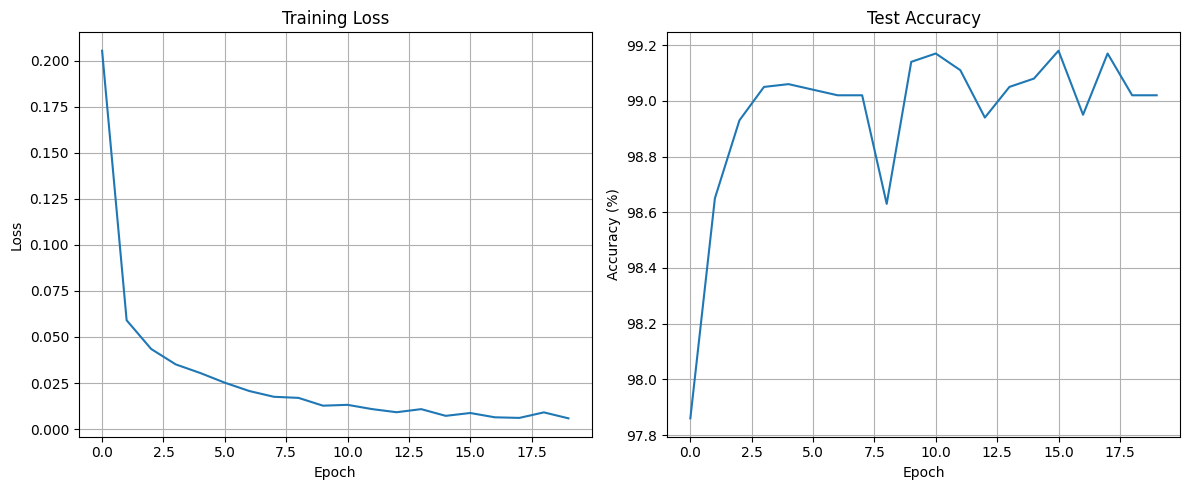

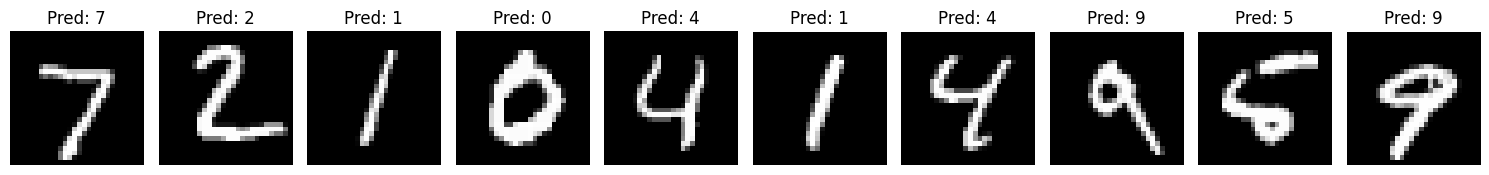


Neural Networks with PyTorch Tutorial Completed!

Additional Resources:
- PyTorch Documentation: https://pytorch.org/docs/stable/index.html
- PyTorch Tutorials: https://pytorch.org/tutorials/
- Deep Learning with PyTorch Book: https://pytorch.org/deep-learning-with-pytorch


In [ ]:
# Plot training progress
plt.figure(figsize=(12, 5))

# Plot 1: Training Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot 2: Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies)
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize some predictions
model.eval()

# Get a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Get predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot the first 10 images with their predictions
plt.figure(figsize=(15, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f'Pred: {predicted[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("\nNeural Networks with PyTorch Tutorial Completed!")

# Additional learning resources
print("\nAdditional Resources:")
print("- PyTorch Documentation: https://pytorch.org/docs/stable/index.html")
print("- PyTorch Tutorials: https://pytorch.org/tutorials/")
print("- Deep Learning with PyTorch Book: https://pytorch.org/deep-learning-with-pytorch")